# Homework 4

## Part a

Using a subset of the IMDB database (only the first 7000 words) we are going to make a model and plot the accuracy.  The model will have two layers of 16 neurons each, with a final layer of one neuron.  Using the model shown below, run it and plot the training loss and accuracy, and the validation loss and accuracy.  Use rmsprop optimizer, batch size = 512, twenty epochs and a 60/40 train/validation split.

In [23]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import gc

from tensorflow.keras.regularizers import l1, l2, l1_l2

from keras.src.callbacks.history import History

#######################################################
# reduced number of words to 7000, from 10000, to speed training
# (train_data, train_labels), _ = imdb.load_data(num_words=10000)
# changed vectorize_squences to 5000 as well
# def vectorize_sequences(sequences, dimension=10000):

(train_data, train_labels), _ = imdb.load_data(num_words=7000)

def vectorize_sequences(sequences, dimension=7000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)


In [2]:
tf.keras.utils.set_random_seed(42)

def plot_results(history: History):
    """
    Plots model accuracy vs epoch AND model loss vs epoch (for train and validation data).
    Also displays average train and validation accuracy and loss.
    Args:
        history (Keras History Object): this is the Keras's History object returned when running model.fit()
    Returns:
        None 
    """
    plt.figure(figsize=(12, 5))

    # final metrics
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    # accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy vs Epochs')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(loc='upper left')
    plt.text(0.05, 0.05, f'Train Acc: {final_train_acc:.4f}\nVal Acc: {final_val_acc:.4f}', 
             transform=plt.gca().transAxes, verticalalignment='bottom')

    # loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss vs Epochs')
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(loc='upper left')
    plt.text(0.09, 0.05, f'Train Loss: {final_train_loss:.4f}\nVal Loss: {final_val_loss:.4f}', 
             transform=plt.gca().transAxes, verticalalignment='bottom')

    plt.tight_layout()
    plt.show()

def plot_results_multi(history, ax_train, ax_val, title):
    """
    Plots model accuracy and loss vs epoch for train and validation data on separate axes.
    Also displays average train and validation accuracy and loss.
    Args:
        history (Keras History Object): Keras's History object returned when running model.fit()
        ax_train (matplotlib.axes.Axes): Axes for plotting training data
        ax_val (matplotlib.axes.Axes): Axes for plotting validation data
        title (str): Title for the subplots
    """
    # final metrics
    final_train_acc = history.history['accuracy'][-1]
    final_val_acc = history.history['val_accuracy'][-1]
    final_train_loss = history.history['loss'][-1]
    final_val_loss = history.history['val_loss'][-1]

    # accuracy plot
    ax_train.plot(history.history['accuracy'], label='Train Accuracy')
    ax_train.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax_train.set_title(f'{title} - Accuracy')
    ax_train.set_xlabel('Epochs')
    ax_train.set_ylabel('Accuracy')
    ax_train.legend(loc='center right')
    ax_train.grid(True)
    ax_train.text(0.05, 0.05, f'Train Acc: {final_train_acc:.4f}\nVal Acc: {final_val_acc:.4f}', 
                  transform=ax_train.transAxes, verticalalignment='bottom')

    # loss plot
    ax_val.plot(history.history['loss'], label='Train Loss')
    ax_val.plot(history.history['val_loss'], label='Validation Loss')
    ax_val.set_title(f'{title} - Loss')
    ax_val.set_xlabel('Epochs')
    ax_val.set_ylabel('Loss')
    ax_val.legend(loc='center right')
    ax_val.grid(True)
    ax_val.text(0.05, 0.05, f'Train Loss: {final_train_loss:.4f}\nVal Loss: {final_val_loss:.4f}', 
                transform=ax_val.transAxes, verticalalignment='bottom')


In [3]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history_a = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4,
                    verbose=0)

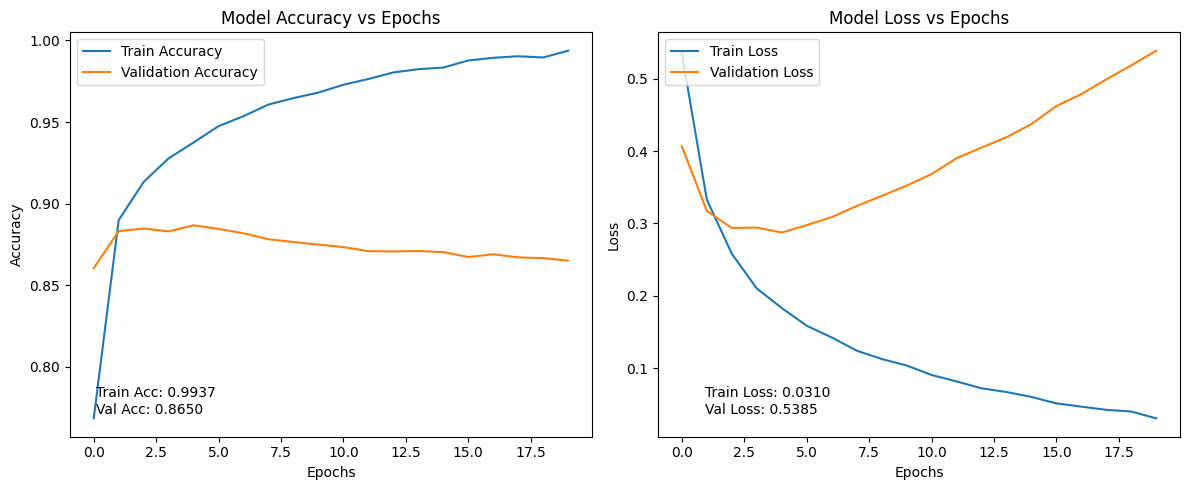

In [4]:
# code to plot the loss and accuracy goes here
plot_results(history_a)

# Part b

This model appears to be overfitting.  Create a model with fewer neurons and see if that fixes overfitting.  Still run it out to 20 epochs.  Plot the loss and accuracy.

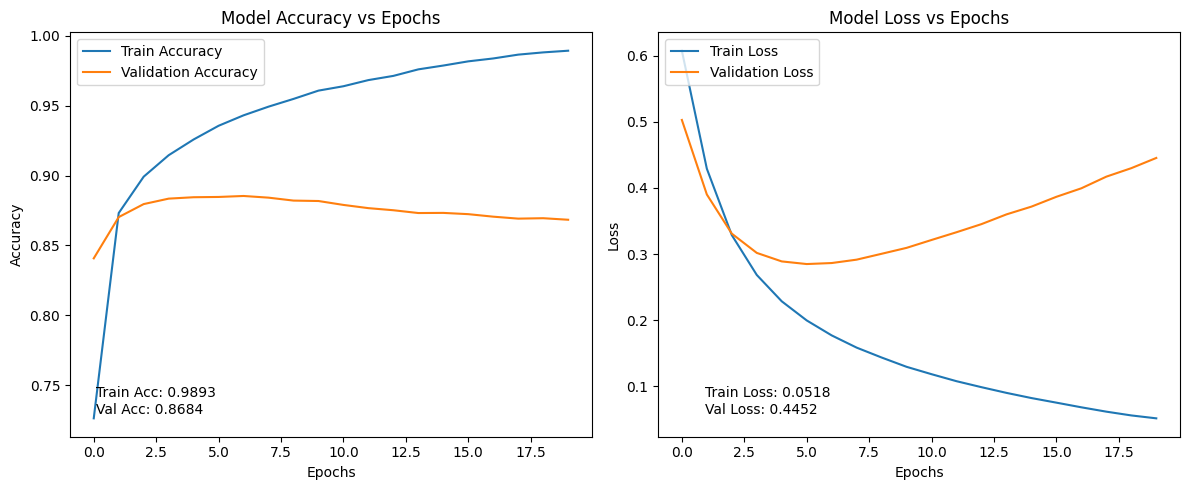

In [5]:
model = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history_b = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4,
                    verbose=0)

plot_results(history_b)

Reducing the amount of neurons in the hidden layers from 16/16 to 2/4 seemed to help reduce the overfitting.

# Part c

Go back to the original model, but use L1 regularization to see if that improves the model.  Plot loss and accuracy.  Use an L1 regularization penalty of 0.002.

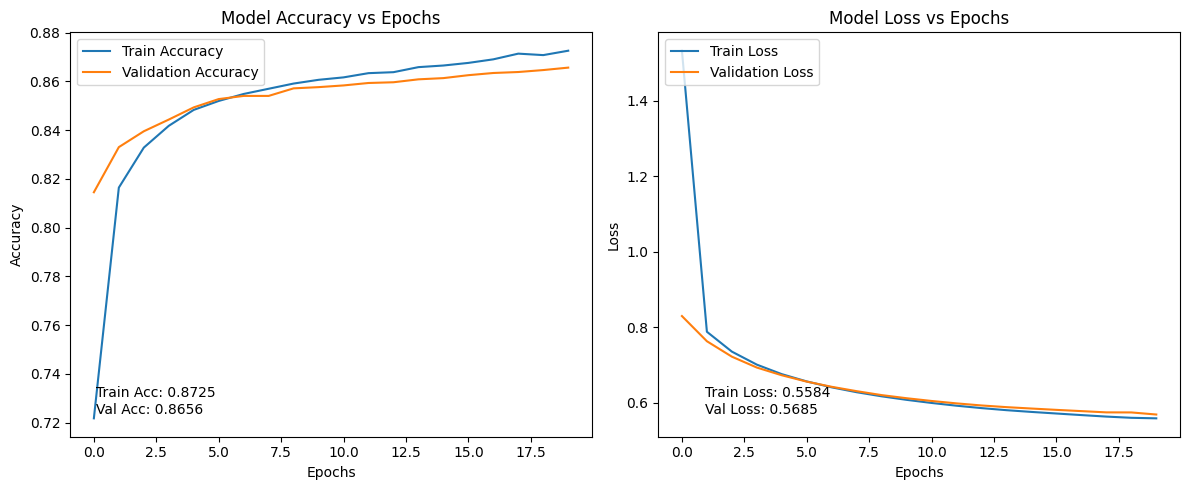

In [6]:
model = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=l1(0.002)), # l1 reg w/ .002 penalty
    layers.Dense(16, activation="relu", kernel_regularizer=l1(0.002)),  # l1 reg w/ .002 penalty
    layers.Dense(1, activation="sigmoid")
])


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history_c = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4,
                    verbose=0)

plot_results(history_c)

# Part d

Same as above, but use L2 regularization.  Use an L2 regularization penalty of 0.002.  Plot the loss and accuracy.

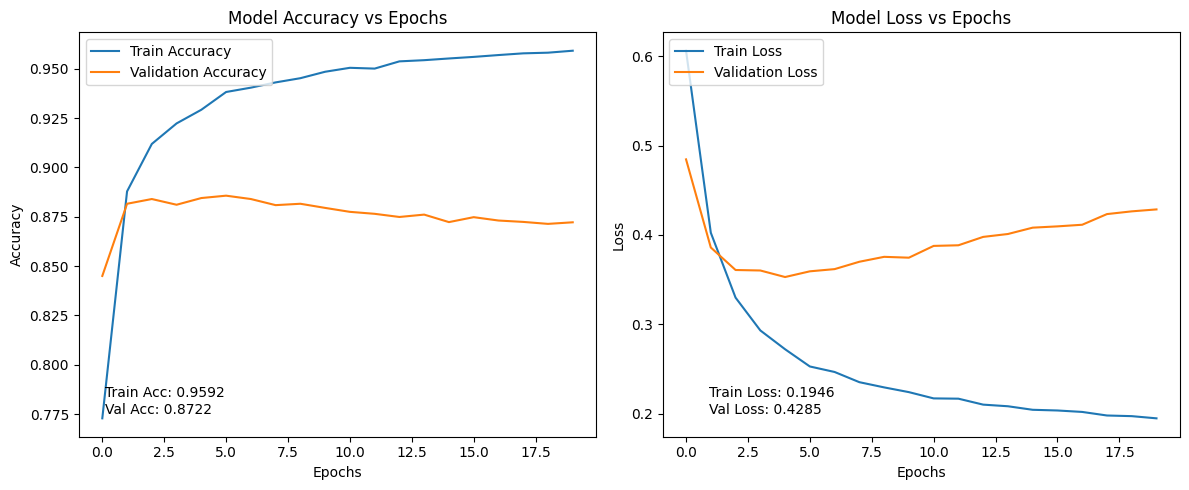

In [7]:
model = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=l2(0.002)), # l2 reg w/ .002 penalty
    layers.Dense(16, activation="relu", kernel_regularizer=l2(0.002)),  # l2 reg w/ .002 penalty
    layers.Dense(1, activation="sigmoid")
])


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history_d = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4,
                    verbose=0)

plot_results(history_d)

# Part e

Create an elastic net model (L1 and L2 regularization) using the same number of neurons and layers as above.  Use an L1 and L2 regularization penalty of 0.001.  Use lambda 0.001 for both.  Plot the loss and accuracy.

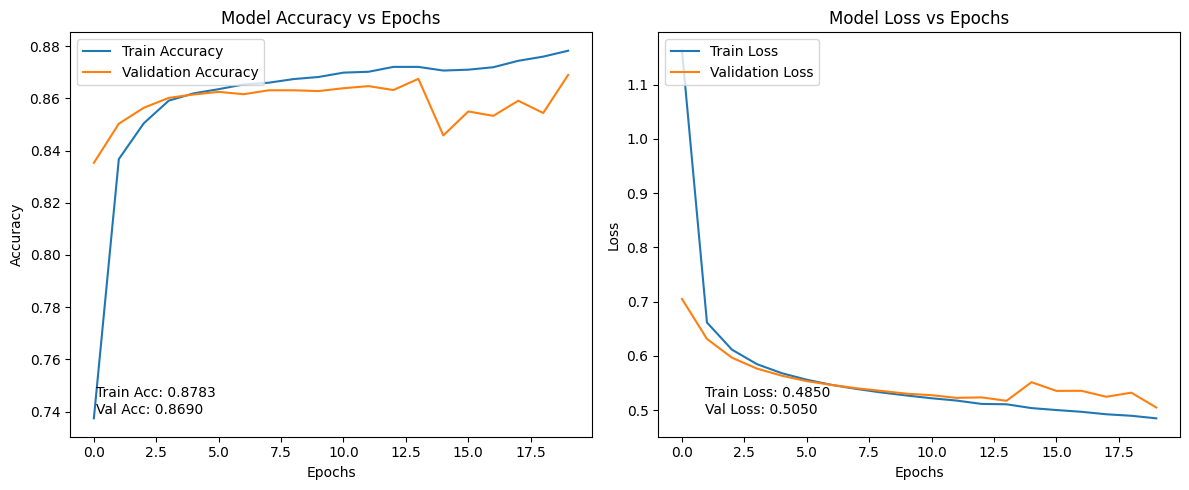

In [8]:
model = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    layers.Dense(16, activation="relu", kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_e = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4,
                    verbose=0)

plot_results(history_e)

# Part f

Use the model from part a and set 50% droputs between the layers.  Plot the loss and accuracy.

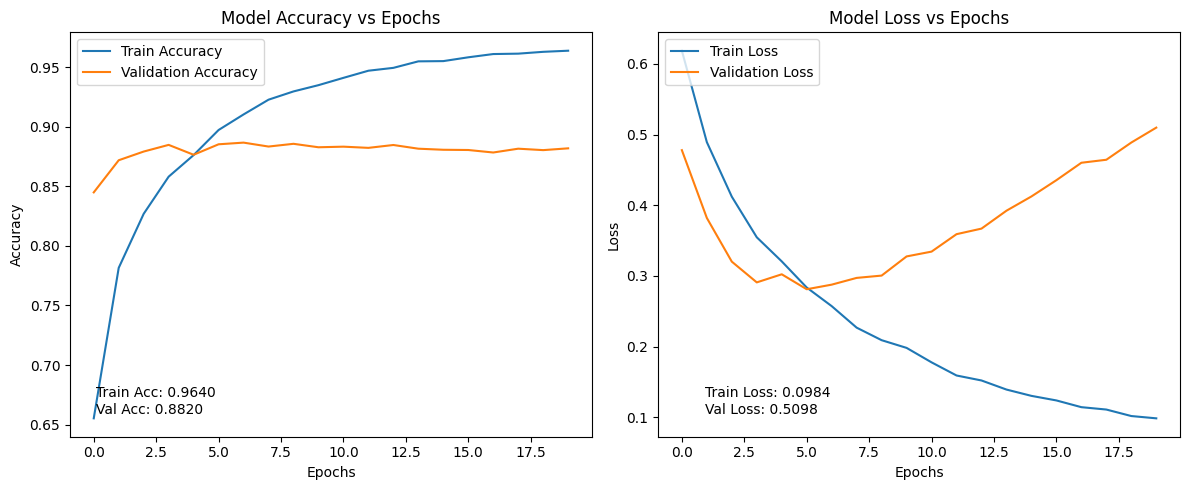

In [9]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),  # 50% dropout 
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),  # 50% dropout 
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_f = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4,
                    verbose=0)

plot_results(history_f)

# Part g

Setup the model from part a, but use a variable learning rate.  Use the lr_schedule setup below for your learing rate.  Plot the loss and accuracy.

In [10]:
N_TRAIN = int(len(train_data) * 0.6)  # size of training data with 60/40% validation split
BATCH_SIZE = 512
STEPS_PER_EPOCH = N_TRAIN//BATCH_SIZE

lr_schedule = tf.keras.optimizers.schedules.InverseTimeDecay(
  0.01,
  decay_steps=STEPS_PER_EPOCH*5,
  decay_rate=1,
  staircase=False)


This graph shows the variable learning rate at each epoch

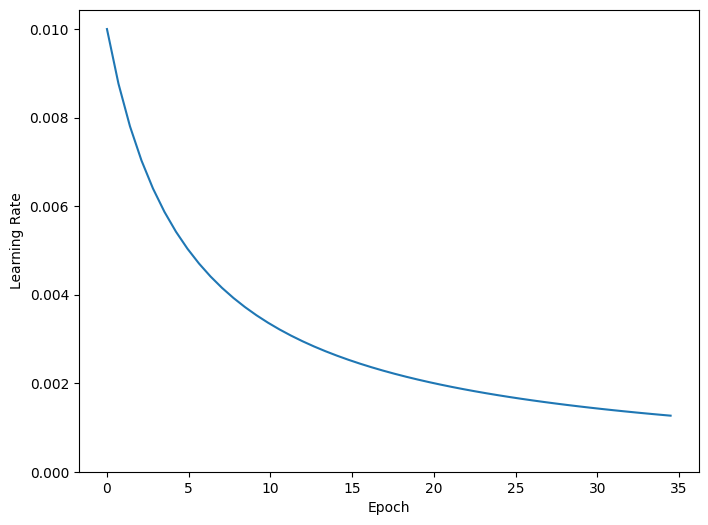

In [11]:
step = np.linspace(0,1000)
lr = lr_schedule(step)
plt.figure(figsize = (8,6))
plt.plot(step/STEPS_PER_EPOCH, lr)
plt.ylim([0,max(plt.ylim())])
plt.xlabel('Epoch')
_ = plt.ylabel('Learning Rate')

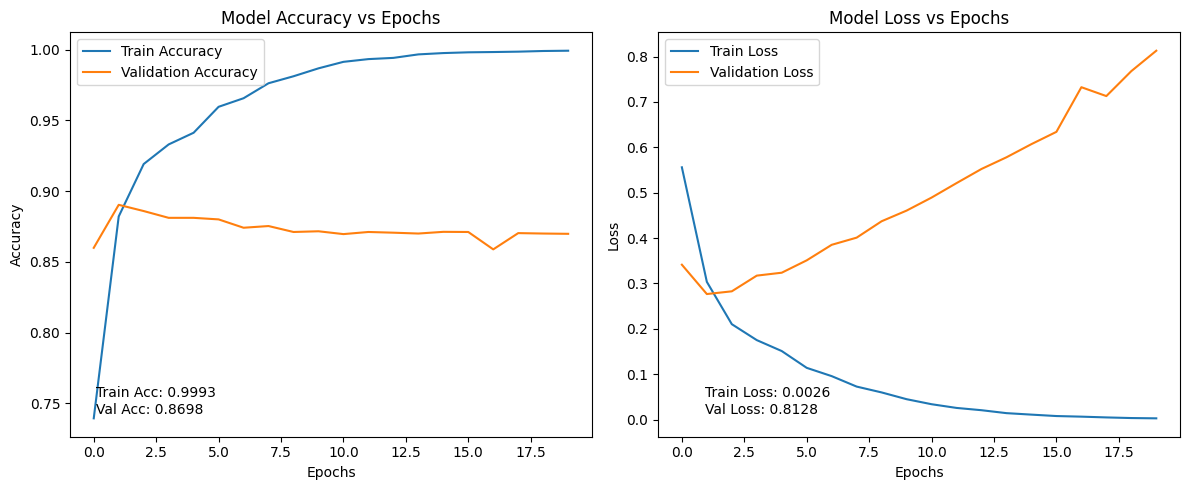

In [12]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_g = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=BATCH_SIZE,
                    validation_split=0.4,
                    verbose=0)

plot_results(history_g)

# Part h

Plot the validation accuracy of all the different models on a single plot with a legend.  Next, plot the validation loss of all the models on a single plot with a legend.

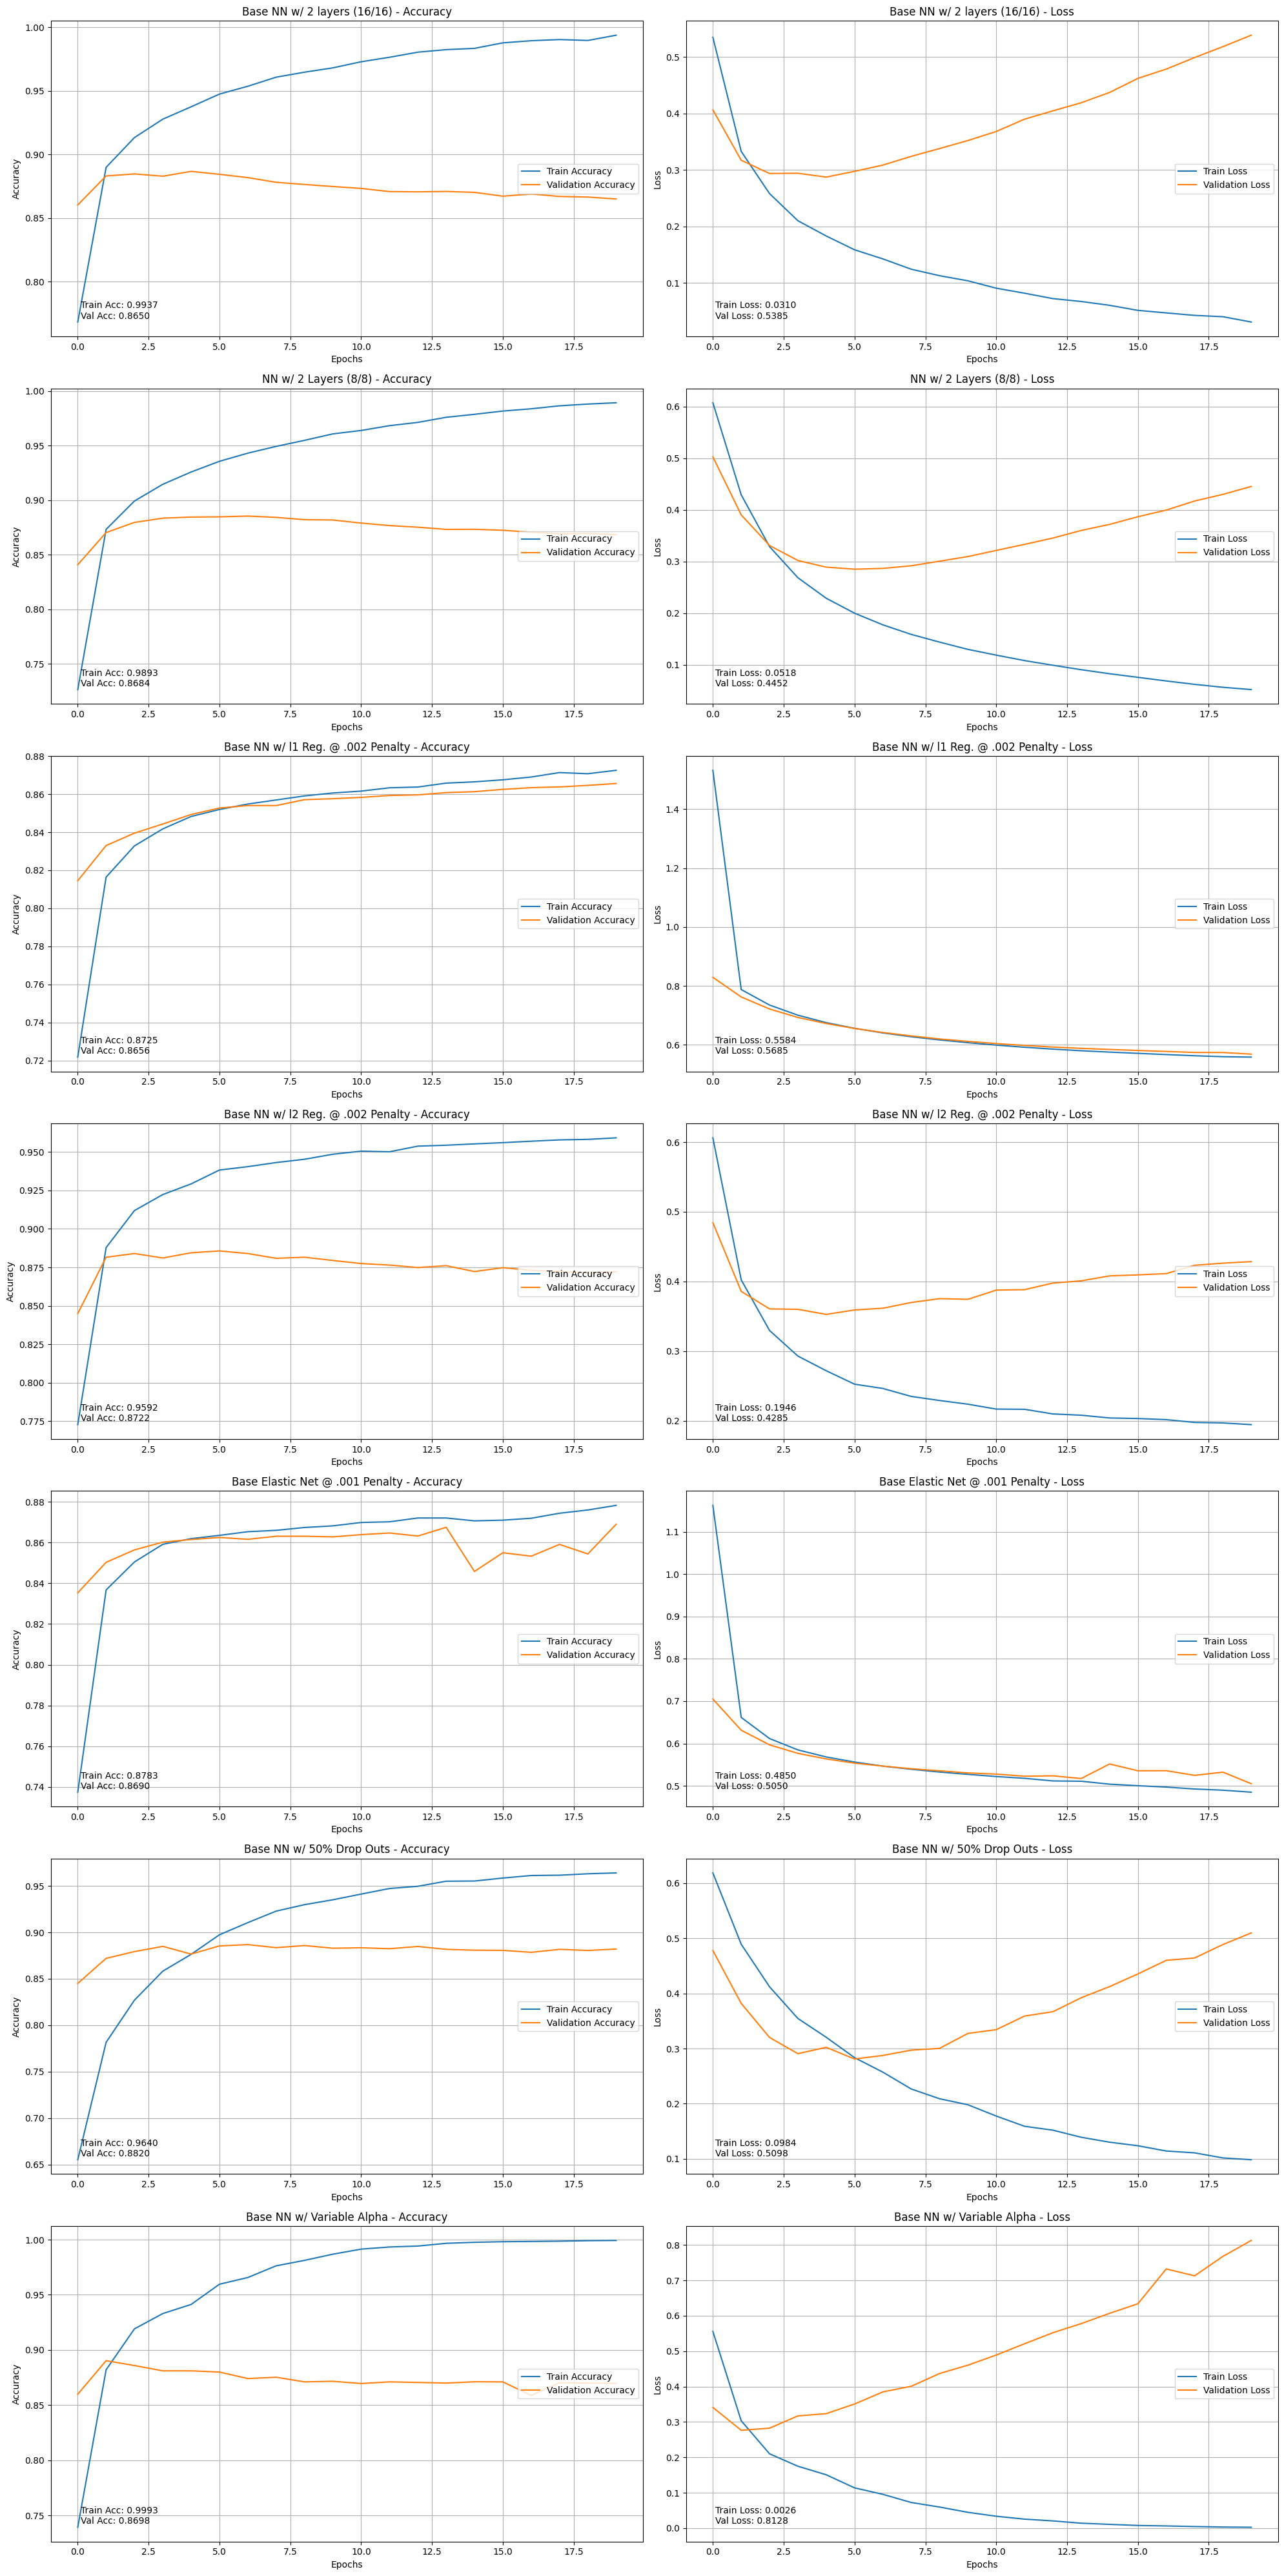

In [13]:
fig, axs = plt.subplots(7, 2, figsize=(20, 40))

histories_p1 = [history_a, history_b, history_c, history_d, history_e, history_f, history_g]
model_desc_p1 = ['Base NN w/ 2 layers (16/16)', 'NN w/ 2 Layers (8/8)', 'Base NN w/ l1 Reg. @ .002 Penalty',
              'Base NN w/ l2 Reg. @ .002 Penalty', 'Base Elastic Net @ .001 Penalty', 'Base NN w/ 50% Drop Outs',
              'Base NN w/ Variable Alpha']

for i, (history, desc) in enumerate(zip(histories_p1, model_desc_p1)):
    plot_results_multi(history, axs[i, 0], axs[i, 1], desc)

plt.tight_layout()
plt.show()


# Part i

Use any combination of the techniques above (more or less neurons, regularization, learning rate, dropout, and any changes to hyperparameters) to create the best validation accuracy model you can.  You must create at least 5 different models.  The final model must be better than any of the models above for full credit.

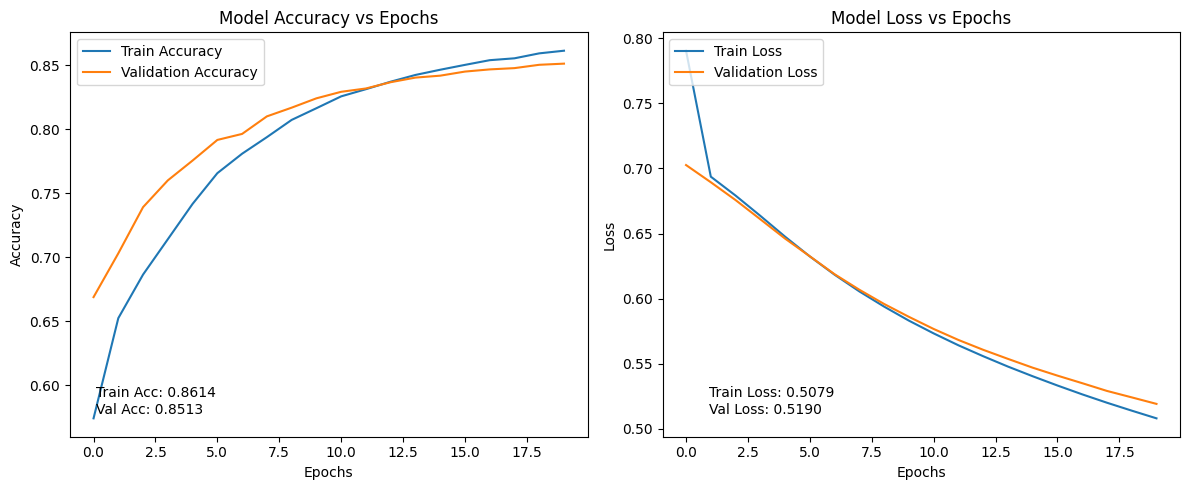

In [14]:
# H1: Base NN w/ reduced Neurons (2/4) and l1 regulation at .002 penalty
model = keras.Sequential([
    layers.Dense(2, activation="relu", kernel_regularizer=l1(0.002)),
    layers.Dense(4, activation="relu", kernel_regularizer=l1(0.002)),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history_h_1 = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4,
                    verbose=0)

plot_results(history_h_1)

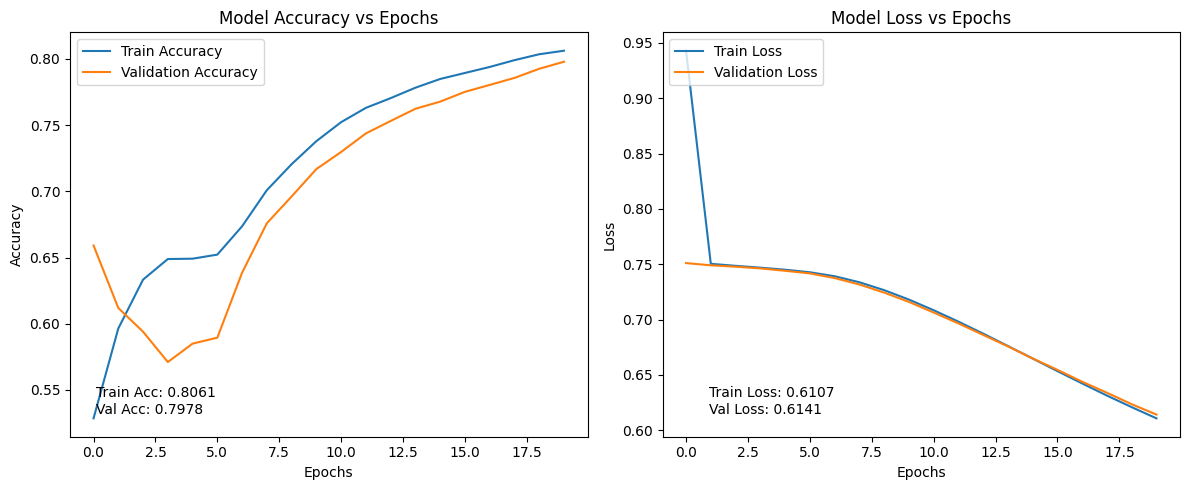

In [15]:
# H2: Base NN w/ reduced Neurons and l1 regulation at .005 penalty
model = keras.Sequential([
    layers.Dense(2, activation="relu", kernel_regularizer=l1(0.005)),
    layers.Dense(4, activation="relu", kernel_regularizer=l1(0.005)),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history_h_2 = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4,
                    verbose=0)

plot_results(history_h_2)

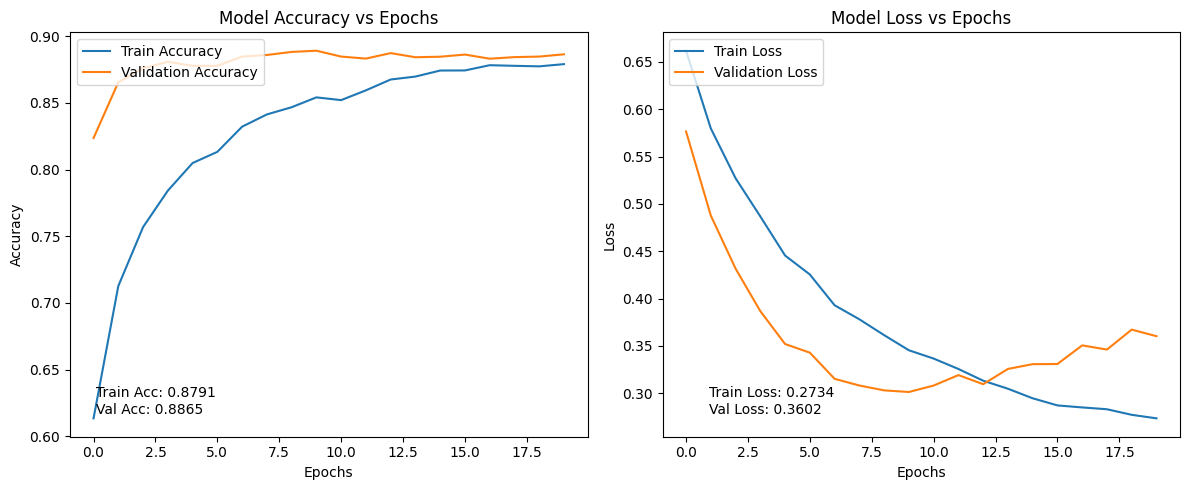

In [16]:
# H3: 2 Layer (6, 11 Neurons) w/ 50% drop out and l1 Reg. @ .001 Penalty for 2nd Layer
tf.keras.utils.set_random_seed(42)

model = keras.Sequential([
    layers.Dense(6, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(11, activation="relu", kernel_regularizer=l1(0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history_h_3 = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4,
                    verbose=0)

plot_results(history_h_3)

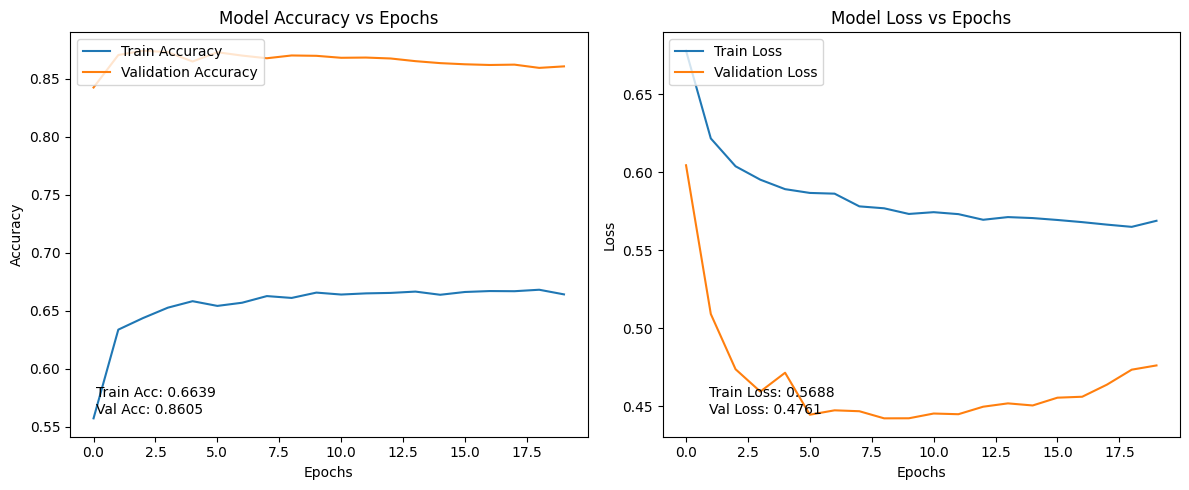

In [17]:
# H4: Base NN w/ reduced Neurons (2/4) and variable learning rate and learning drop out
optimizer = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)

model = keras.Sequential([
    layers.Dense(2, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(4, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_h_4 = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=BATCH_SIZE,
                    validation_split=0.4,
                    verbose=0)

plot_results(history_h_4)

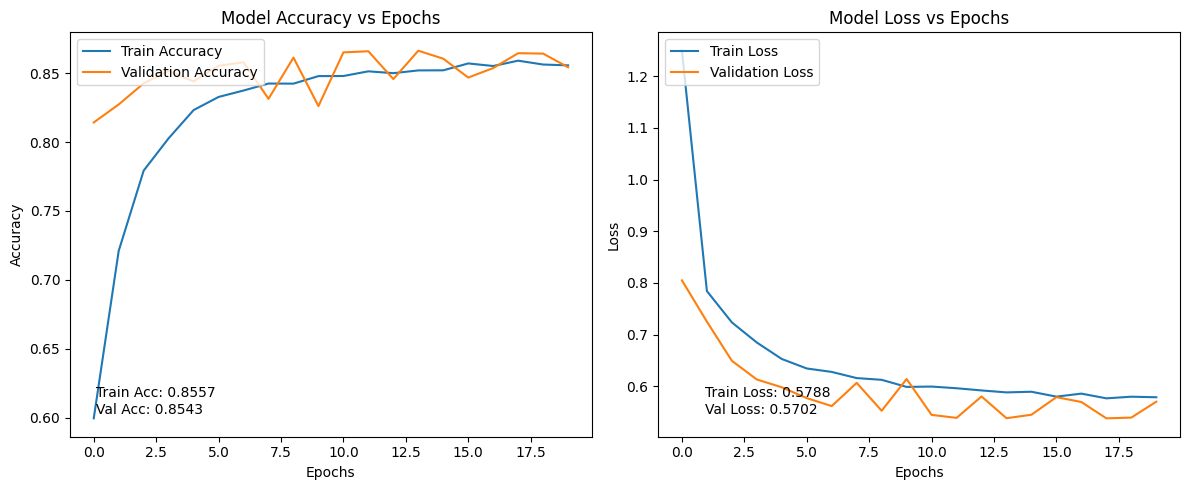

In [18]:
# H5: Base NN w/ reduced Neurons (2/8) and l1_l2 regulation at .002 penalty
model = keras.Sequential([
    layers.Dense(16, activation="relu", kernel_regularizer=l1_l2(.001)),
    layers.Dropout(0.5),
    layers.Dense(32, activation="relu",  kernel_regularizer=l1_l2(.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history_h_5 = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4,
                    verbose=0)

plot_results(history_h_5)

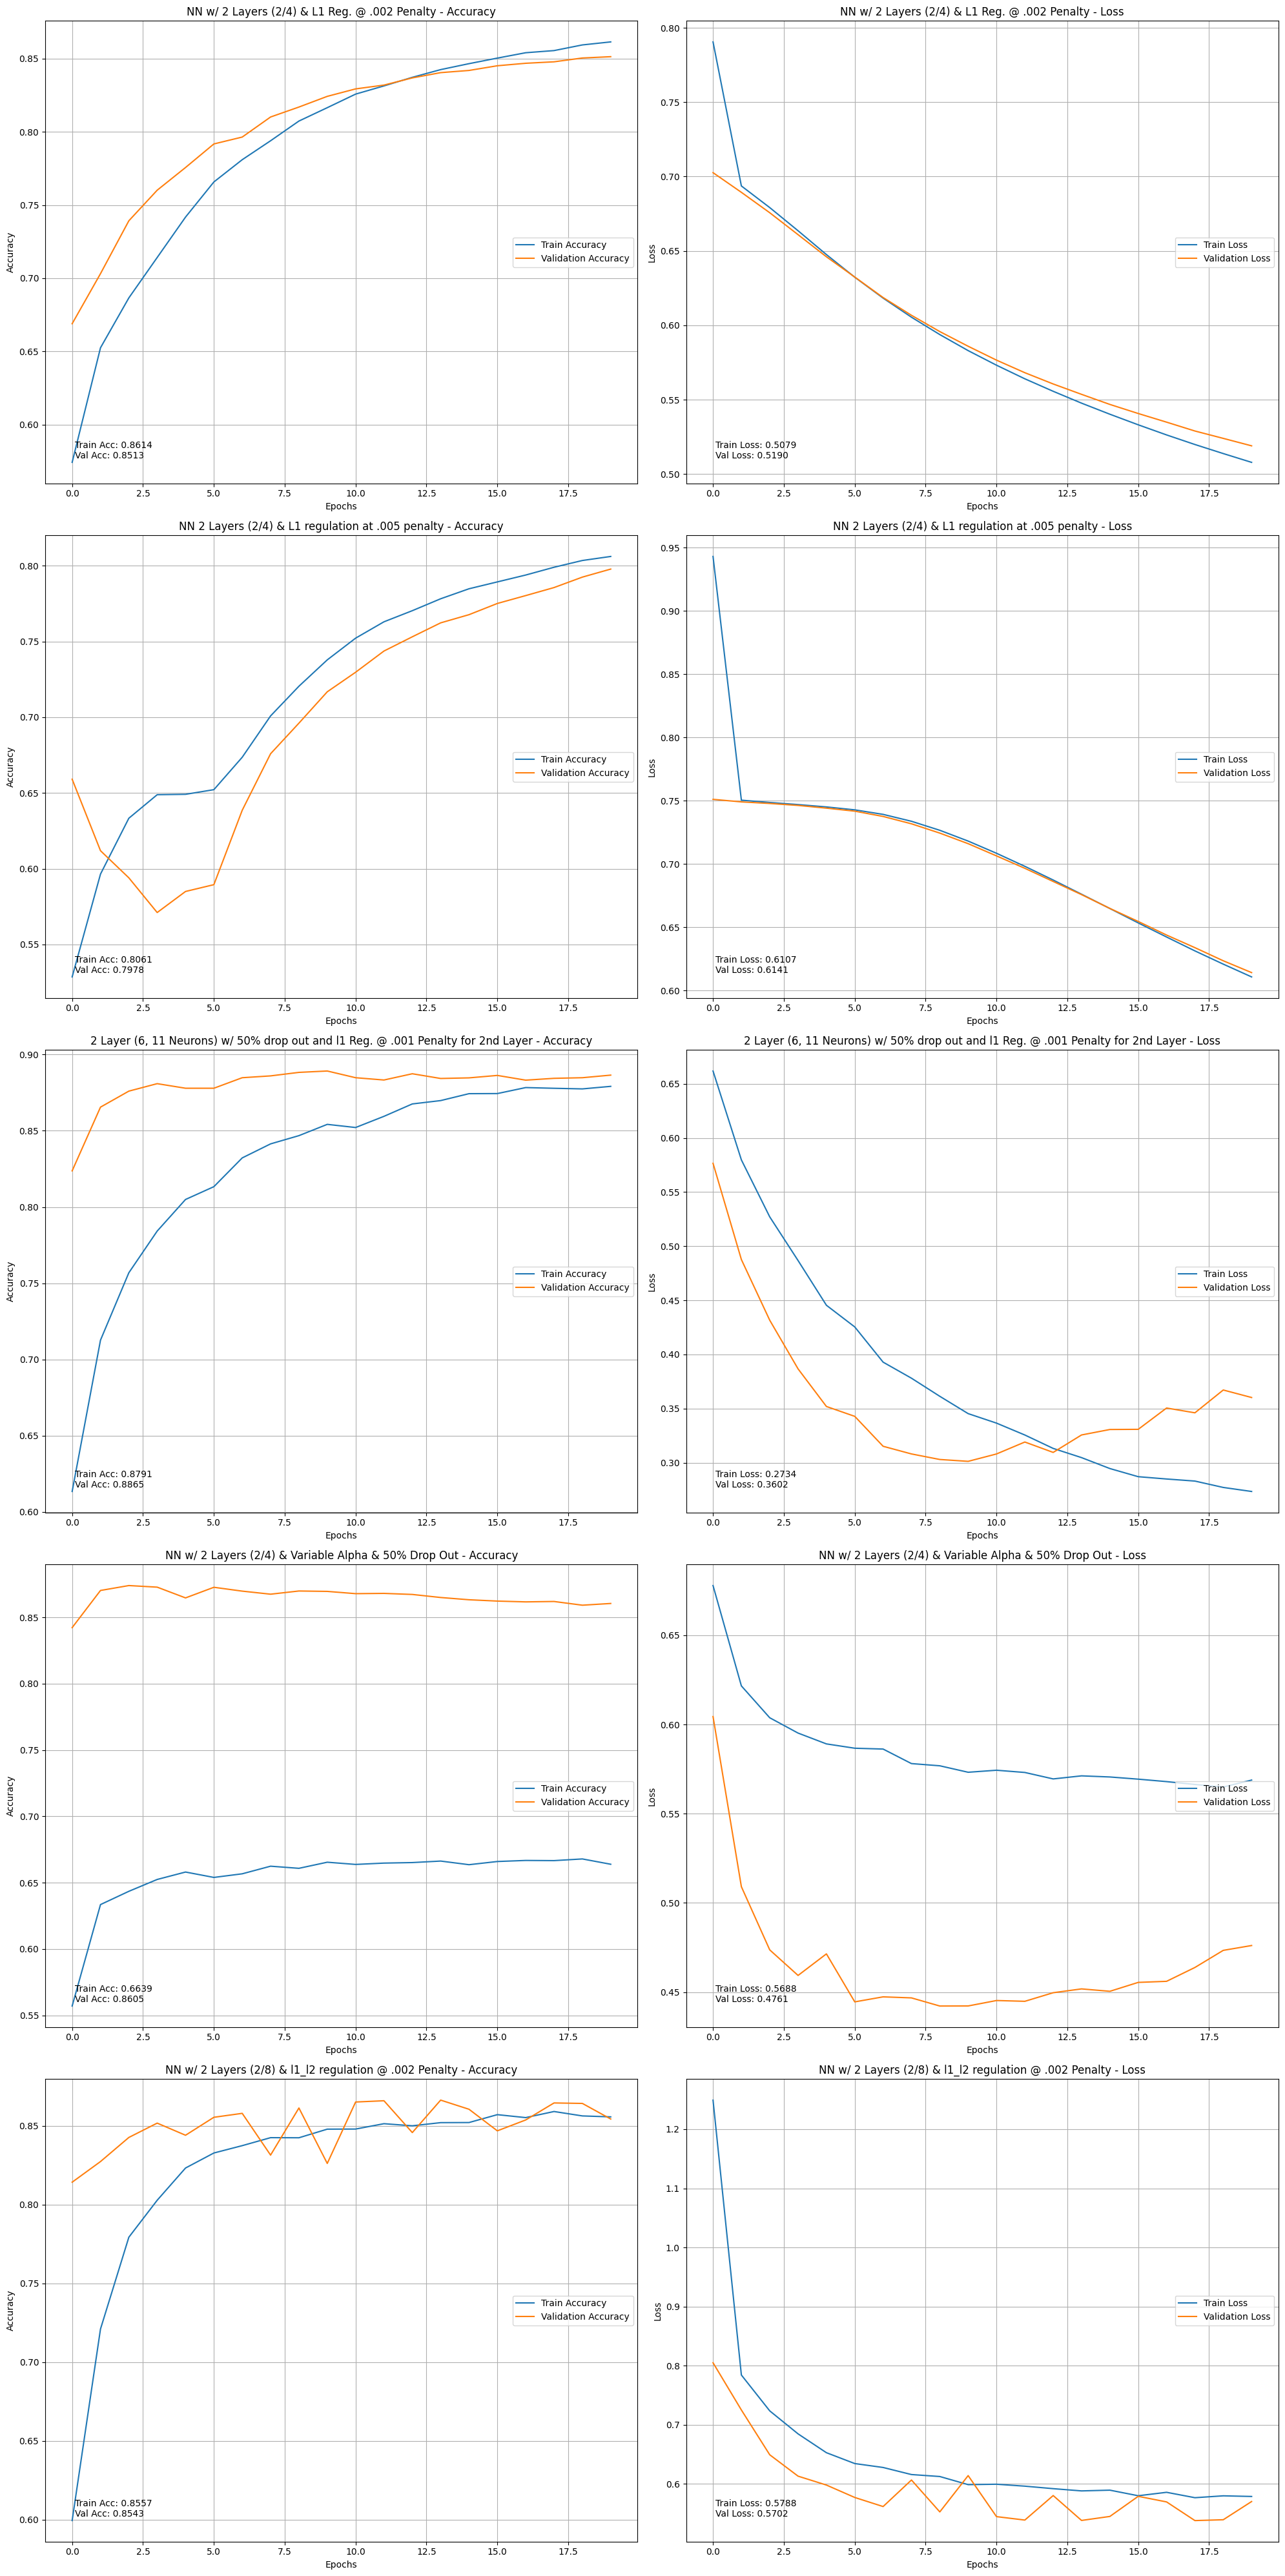

In [19]:
fig, axs = plt.subplots(5, 2, figsize=(20, 40))

histories_p2 = [history_h_1, history_h_2, history_h_3, history_h_4, history_h_5]
model_desc_p2 = ['NN w/ 2 Layers (2/4) & L1 Reg. @ .002 Penalty', 'NN 2 Layers (2/4) & L1 regulation at .005 penalty',
              '2 Layer (6, 11 Neurons) w/ 50% drop out and l1 Reg. @ .001 Penalty for 2nd Layer', 'NN w/ 2 Layers (2/4) & Variable Alpha & 50% Drop Out',
              'NN w/ 2 Layers (2/8) & l1_l2 regulation @ .002 Penalty']

for i, (history, desc) in enumerate(zip(histories_p2, model_desc_p2)):
    plot_results_multi(history, axs[i, 0], axs[i, 1], desc)

plt.tight_layout()
plt.show()



### Best Model from Part 1:

- Model from part a and set 50% droputs between the layers.  Plot the loss and accuracy.
    - 1st layer w/ 16 Neurons, activation="relu"
    - 50% drop out
    - 2nd layer w/ 16 Neurons, activation="relu"
    - 50% drop out
    - Final layer with 1 Neuron, activation="sigmoid"

Final Validation Accuracy = 0.8820


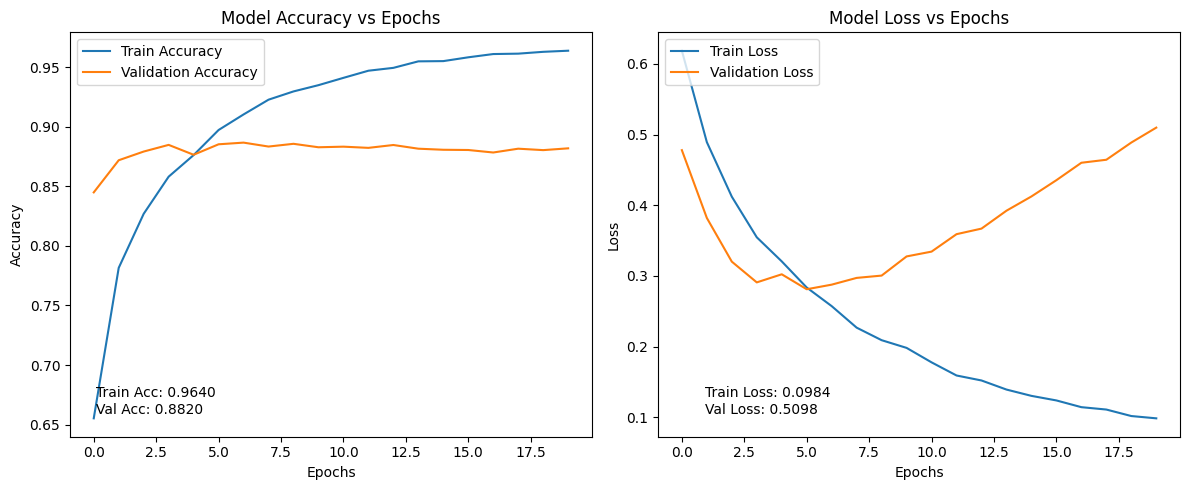

In [20]:
plot_results(history=history_f)

### Best Model from Part 2:

- Combination of hyperparameters from Part 1
    - 1st layer w/ __6 Neurons__, activation="relu"
    - 50% drop out
    - 2nd layer w/ __11 Neurons__, activation="relu", __kernal_reg=L1 @ .001 Penalty__
    - 50% drop out
    - Final layer with 1 Neuron, activation="sigmoid"

Final Validation Accuracy = 0.8865


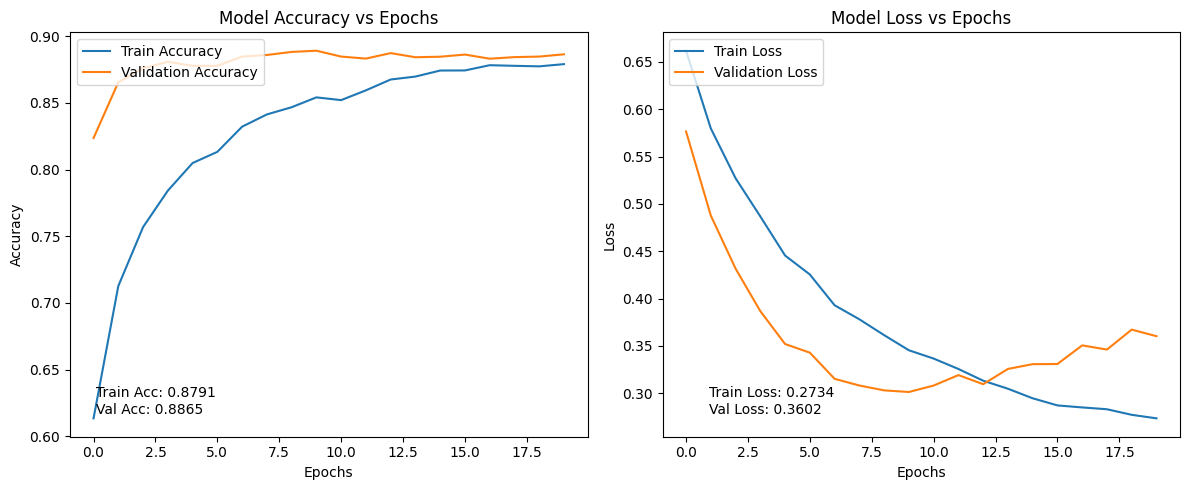

In [21]:
plot_results(history=history_h_3)

A whopping 0.45% increase in performance!

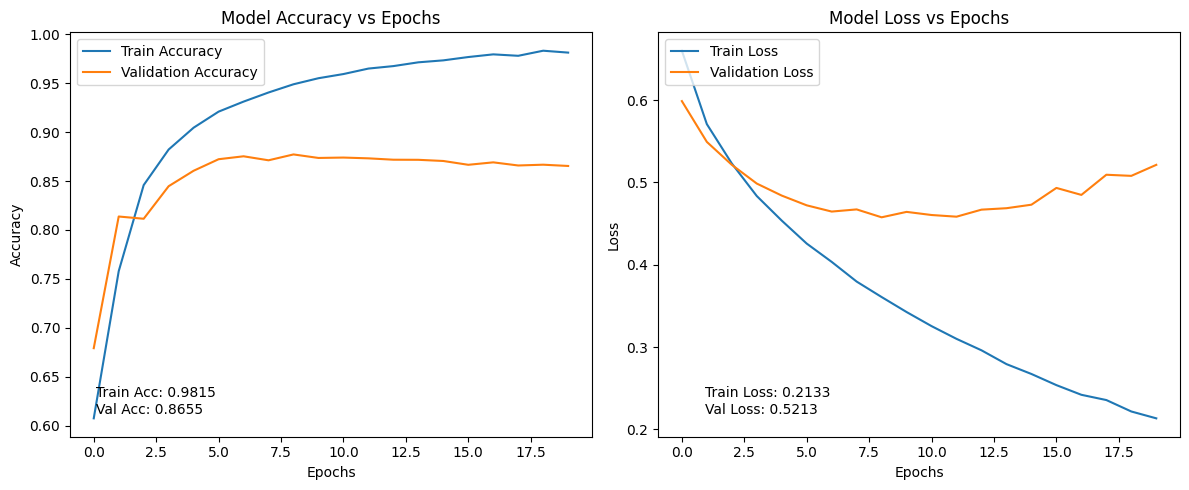

In [22]:

tf.keras.utils.set_random_seed(42)

model = keras.Sequential([
    layers.Dense(6, activation="relu"),
    layers.Dense(10, activation="relu", kernel_regularizer=l1_l2(0.001, 0.001)),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


history_dev = model.fit(train_data, train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_split=0.4,
                    verbose=0)

plot_results(history_dev)